### 5. Dice rolls convergence
Simulate:

  a)   100 dice rolls and count the number of outcome six. (*)

  b)   10, 100, 1000, 10000, 100000, 1000000 dice rolls. Count the number of outcome six in each simulation and store it in a list. Compute the probability of outcome six in each simulation. (**)

In [77]:
import random
li = []
counter = 0

for i in range(100):
    a = random.randint(1,6)
    li.append(a) # appends to list
    if a == 6:
        counter +=1
print(f"All rolls: {li}")
print(f"Ammount of sixes: {counter}")


All rolls: [5, 6, 1, 6, 3, 5, 3, 2, 3, 4, 6, 5, 3, 1, 4, 2, 2, 1, 1, 1, 3, 4, 1, 6, 1, 1, 4, 1, 6, 5, 4, 1, 4, 1, 1, 2, 5, 5, 4, 2, 6, 4, 2, 6, 4, 3, 5, 4, 5, 6, 4, 3, 4, 4, 1, 5, 4, 1, 2, 1, 1, 1, 5, 6, 1, 2, 4, 3, 6, 3, 4, 5, 6, 3, 5, 3, 4, 4, 4, 6, 6, 3, 6, 1, 5, 1, 5, 5, 4, 6, 6, 4, 6, 5, 5, 1, 1, 4, 3, 4]
Ammount of sixes: 17


0.15
0.178
0.1668
0.16649
0.166609
0.166568
[0.15, 0.178, 0.1668, 0.16649, 0.166609, 0.166568]


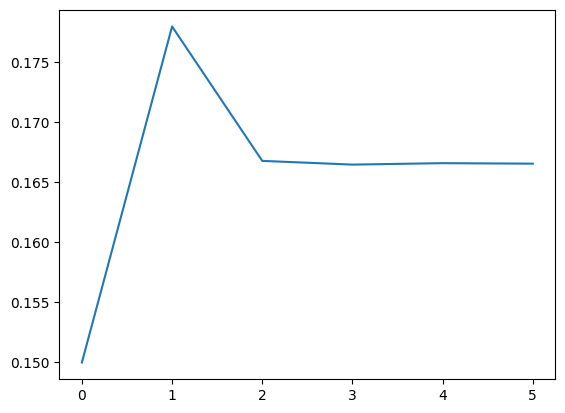

In [2]:
# it ain't quick, it ain't pretty, but it works

import random
import matplotlib.pyplot as plt
all_rolls = []
n = 100

def func(n):
    counter = 0
    for i in range(n):
        a = random.randint(1,6)
        all_rolls.append(a) # appends all rolls to list
        if a == 6:
            counter +=1
    probability = counter/n
    print(probability)
    prob_list.append(probability)
    return probability

prob_list = []

n = 100
while n <= 10**7:
    func(n)
    n = n*10
print(prob_list)

plt.plot(prob_list)

### 7. A cute rabbit among two ferocious snakes (Monty Hall problem)

There are three identical doors, behind two of them, there are ferocious snakes and behind one of them is a cute little rabbit. Your aim is to pick a door and get the cute rabbit. You start picking one door randomly and suddenly another door opens and snake slithers away pssss. Now you have a choice to either stay with your door or change to the remaining door.

  a) What is your choice and why? (**)

  b) Randomly assign which door has the rabbit, and randomly pick an initial door. Now simulate 10, 100, 1000, 10000, 100000, 1000000 times for staying and for switching doors. Calculate the proportion of finding the rabbits for each set of simulations. Plot the results (**)

## Okay, let's start over as I seem to have fallen into some kind of <i>rabbit</i> hole.
```
1. Game state generation.

2. Choice.

2/3 to select Snake on initial choice, regardless of game state.
1/3 to select Rabbit on initial choice, regardless of game state.

Let's call the selections snake_select and rabbit_select.

3. Open door.

if rabbit_select:
    open snake_door1 or snake_door2
if snake_select_1:
    open snake_door2
if snake_select_2:
    open snake_door1

4. Switch
if rabbit_select (1/3), Agent should not switch.
if snake_select (2/3), Agent should switch.
```
I'm not really sure why it didn't make much sense when I first approached this problem, but now it does.

Number of wins in scenario where option to switch is set to True: 
1 out of 1, percentage = 100.0 %, 
Number of wins in scenario where option to switch is set to True: 
7 out of 10, percentage = 70.0 %, 
Number of wins in scenario where option to switch is set to True: 
62 out of 100, percentage = 62.0 %, 
Number of wins in scenario where option to switch is set to True: 
667 out of 1000, percentage = 66.7 %, 
Number of wins in scenario where option to switch is set to True: 
6636 out of 10000, percentage = 66.36 %, 
Number of wins in scenario where option to switch is set to True: 
66672 out of 100000, percentage = 66.67 %, 
Number of wins in scenario where option to switch is set to True: 
667220 out of 1000000, percentage = 66.72 %, 
Number of wins in scenario, switch=False: 
0 out of 1, percentage = 0.0 %, 
Number of wins in scenario, switch=False: 
3 out of 10, percentage = 30.0 %, 
Number of wins in scenario, switch=False: 
31 out of 100, percentage = 31.0 %, 
Number of wins in s

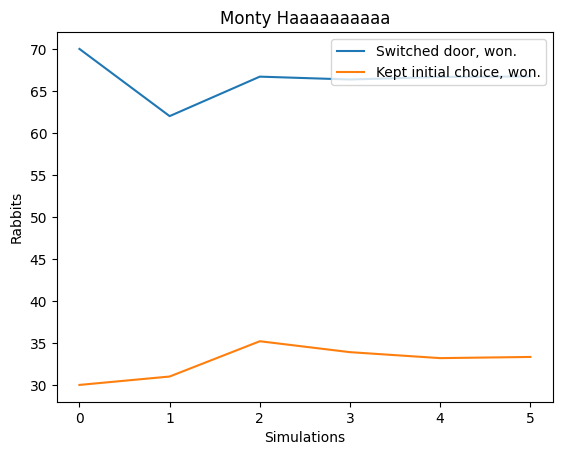

In [3]:
"""
Attempt 5

Back to basics. I reconsidered the entire thing and started over. Okay, this really was an excellent excercise, since
it taught me so much - and most importantly, the importance of disregarding uninteresting data. 

Github user vcrn sent me his solution. Great guy - and great code. I also learned about the XOR ^ operator and YOOO HOW TO IMPLEMENT SET THEORY LESS GO
Anyway, symmetric difference in set theory is bascially the same thing as XOR in Python. (Correct me if I'm wrong!)

"""

import random
import matplotlib.pyplot as plt

# Takes one argument (switch).
def monty_hall_sim(switch: bool) -> bool:   # Returns bool (win or loose).

    # Instead of a list, we create a set to hold the game state.
    # Since sets are unordered and allows no duplicate, we can much easier alter their values in response to door choice.
    possible_doors = {1,2,3}

    # Same as previous, we use a random integer to select door.
    chosen_door = random.randint(1,3)

    # Same as previous, we select game state at random.
    winning_door = random.randint(1,3)

    # Using XOR to prevent the Rabbit door to be opened. Symmetric difference!
    doors_to_open = possible_doors ^ {winning_door,
                                      chosen_door}
   
    # Chooses door at random if Rabbit door is selected.
    open_door = random.choice(tuple(doors_to_open)) 

    # Switches to possible door or selects chosen door.
    (switch_door,) = possible_doors ^ {open_door, chosen_door}

    # Using boolean with multiple conditions as previous, but cleaner.
    if switch and switch_door == winning_door:
        return True
    elif not switch and chosen_door == winning_door:
        return True
    else:
        return False

if __name__ == "__main__":
    rabbit_switch_won = []
    rabbit_no_switch_won = []
    
    for i in range(7):
        tries = 10**i 
        wins = 0
        switch = True

        for simulation in range(tries):  
            if monty_hall_sim(switch):      
                wins += 1
        percentage_win = round(100 * wins / tries,2)
        if switch == True:
            rabbit_switch_won.append(percentage_win)
        else:
            rabbit_no_switch_won.append(percentage_win)
        print(
            f"Number of wins in scenario where option to switch is set to {switch}: \n{wins} out of {tries}, "
            f"percentage = {round(100 * wins / tries, 2)} %, ")
            
    # Running it again with Switch = False, yeah I know its lazy, will fix later. Maybe.
    for i in range(7):
        tries = 10**i 
        wins = 0
        switch = False

        for simulation in range(tries):  
            if monty_hall_sim(switch):      
                wins += 1
        percentage_win = round(100 * wins / tries,2)
        if switch == True:
            rabbit_switch_won.append(percentage_win)
        else:
            rabbit_no_switch_won.append(percentage_win)
        print(
            f"Number of wins in scenario, {switch=}: \n{wins} out of {tries}, "
            f"percentage = {round(100 * wins / tries, 2)} %, ")
            
    rabbit_switch_won.pop(0), rabbit_no_switch_won.pop(0)        

plt.plot(rabbit_switch_won, label="Switched door, won.")
plt.plot(rabbit_no_switch_won, label="Kept initial choice, won.")
plt.ylabel("Win percentage")
plt.xlabel("Simulations")
plt.legend(loc="middle right")
plt.title("Monty Haaaaaaaaaa")

print(
    f"{rabbit_switch_won=} \n"
    f"{rabbit_no_switch_won=} \n")

## Visualising the problem

This question or rather the thought experiment is very interesting because it questions the concepts of <i>choice</i> and <i>randomness.</i> Let me present the following wall of text, aka. how I broke my intuition.

What the Agent sees:
## 🚪 🚪 🚪

Possible positions(pos) not visible to Agent:

|game state|1  |2  |3  |
|:--|:--|:--|:--|
|pos1| 🐇| 🐍| 🐍|
|pos2| 🐍| 🐇| 🐍|
|pos3| 🐍| 🐍| 🐇|

After the agent selects a door, another door opens.<br>
The door opened cannot contain a Rabbit and it cannot be the same as agent selection.

```
If pos1, door open = 2 OR 3
If pos2, door open = 1 OR 3
If pos3, door open = 1 OR 2
```

Giving us six possible open doors:
###### (Empty cell = open door)
|game state|1  |2  |3  |
|:--|:--|:--|:--|
|pos1_open2|🐇||🐍|
|pos1_open3|🐇|🐍||
|pos2_open1||🐇|🐍|
|pos2_open3|🐍|🐇||
|pos3_open1||🐍|🐇|
|pos3_open2|🐍||🐇|

But this table is incomplete since we haven't followed all rules. The initial game state (pos1,pos2,pos3) changes with the initial choice (choice1,choice2,choice3). Since the selected door cannot be opened:

```
If pos1 and choice 1: door open 2 OR 3
If pos1 and choice 2: door open 3
If pos1 and choice 3: door open 2

If pos2 and choice 1: door open 3
If pos2 and choice 2: door open 1 OR 3
If pos2 and choice 3: door open 1

If pos3 and choice 1: door open 2
If pos3 and choice 2: door open 1
If pos3 and choice 3: door open 1 OR 2

```
This gives us a total of 12 game states.

The pattern is starting to get interesting, and we haven't even started running simulations yet! It's like a coin flip in 1/3. In the other 2/3 the door opened is NOT random, since opening the rabbit door would break the rules.

From the Agent's point of view it might appear random, this however is an illusion, which becomes clear if we further break down the game into states.

```
if pos(n) == choice(n): flip coin to open any snake door (always random)
if pos(n) != choice(n): open other snake door (cannot ever be random)
```

Let's make a new table and sort the possible states by initial choice.

|initial choice|1  |2  |3  |
|:--|:--|:--|:--|
|choice_1, pos_1, open_2|🐇||🐍|
|choice_1, pos_1, open_3|🐇|🐍||
|choice_1, pos_2, open_3|🐍|🐇||
|choice_1, pos_3, open_2|🐍||🐇|
|choice_2, pos_1, open_3|🐇|🐍||
|choice_2, pos_2, open_1||🐇|🐍|
|choice_2, pos_2, open_3|🐍|🐇||
|choice_2, pos_3, open_1||🐍|🐇|
|choice_3, pos_1, open_2|🐇||🐍|
|choice_3, pos_2, open_1||🐇|🐍|
|choice_3, pos_3, open_1||🐍|🐇|
|choice_3, pos_3, open_2|🐍||🐇|

<br>

Looking at the new table, regardless of initial choice, the Agent always selects either Snake (1/2) or Rabbit (1/2) and the switch is always to what has not been selected. It is NEVER 1/3. As such it shouldn't matter which door is opened since the door opened is either (50% Snake + 50% Snake) OR (100% Snake).

What about the duplicate states? Why do they appear, and do they matter? Let's have a look, just to be sure. Let's sort the states by door opened:

|door opened|1  |2  |3  |
|:----------------------|:---|:---|:---|
|pos_2, choice_2, open_1||🐇|🐍|
|pos_2, choice_3, open_1||🐇|🐍|
|pos_3, choice_2, open_1||🐍|🐇|
|pos_3, choice_3, open_1||🐍|🐇|
|pos_1, choice_1, open_2|🐇||🐍|
|pos_1, choice_3, open_2|🐇||🐍|
|pos_3, choice_1, open_2|🐍||🐇|
|pos_3, choice_3, open_2|🐍||🐇|
|pos_1, choice_1, open_3|🐇|🐍||
|pos_1, choice_2, open_3|🐇|🐍||
|pos_2, choice_1, open_3|🐍|🐇||
|pos_2, choice_2, open_3|🐍|🐇||

The duplicate states appear when the same door is opened within the same initial position. So are they duplicates or not? Well, yes and no. The choice parameter is different, but this initial choice, I would argue, is <b>not a real choice</b>, and it's even worse when asking the "switch"-question. 

This is because of language semantics. The Agent cannot "switch" door, and while phrasing the decision as such might be correct within the ambiguity of human language it is not correct in regards of the game state and outcome.

```
pos_2, choice_2, open_1 + Switch TRUE = Rabbit
pos_2, choice_3, open_1 + Switch FALSE = Snake
```

But what happens if we pose the question in a different way?
```
pos_2, choice_2, open_1 + Open door 2? = Rabbit
pos_2, choice_2, open_1 + Open door 3? = Snake
pos_2, choice_3, open_1 + Open door 2? = Rabbit
pos_2, choice_3, open_1 + Open door 3? = Snake
```

Let's merge and assign values to each state instead. Snakes are 0, Rabbits are 1.

```
pos_2, choice_2, open_1 = 0,1,0
pos_2, choice_3, open_1 = 0,1,0
pos_3, choice_2, open_1 = 0,0,1
pos_3, choice_3, open_1 = 0,0,1

pos_1, choice_1, open_2 = 1,0,0
pos_1, choice_3, open_2 = 1,0,0
pos_3, choice_1, open_2 = 0,0,1
pos_3, choice_3, open_2 = 0,0,1

pos_1, choice_1, open_3 = 1,0,0
pos_1, choice_2, open_3 = 1,0,0
pos_2, choice_1, open_3 = 0,1,0
pos_2, choice_2, open_3 = 0,1,0


state1=[1,0,0]
state2=[0,1,0]
state3=[0,0,1]
```
And we're back to three states again. However there's four occurences of each. These states are not visible to the Agent, which interestingly seems to matter. (Or does it?)

Agent POV:
```
state1=[?,?,0]
state2=[0,?,?]
state3=[?,0,?]

Hence the agent needs to select:

state1: select door 1 or 2
state2: select door 2 or 3
state3: select door 1 or 3

giving us the following possibilities:

state1, door 1 = Rabbit
state1, door 2 = No rabbit
state2, door 2 = Rabbit
state2, door 3 = No rabbit
state3, door 1 = No rabbit
state3, door 3 = Rabbit

````

It is still 50% regardless choice. So where does intuition break down?<br>
Is it incorrect to represent snakes with zeroes and rabbits with ones?<br>

To indicate if a door is opened or not, perhaps the states should be represented using "R", "S", "O" (Rabbit, Snake, Open), as this method creates a distinction between an open door and a closed door.

This means we have three values instead of two. This does not change the game states but it changes the <i>perception</i>.

I have also used reasoning without taking into consideration that time is linear and events follow in a certain order. (Actually I want to do calculations with wave function collapse but first I will try to comprehend why it ISN'T 50/50 using linear time flow.)

We have four events which MUST occur in the following order:

```
1) game_state_generation: 
    state = 100, 010 or 001
    return state
    #Completely random. (1 of 3)

2) initial_door_choice:
    choice = 100, 010 or 001
    return choice
    #Completely random. (1 of 3)

3) door_open:
    if choice == state:
        open_random
        return door_open
        #Completely random. (1 of 2)

    else
        open_determined
        return door_open
        #NOT random (1 of 1)

4) switch:
    if switch = TRUE:
        choice = choice + 1
    else
        pass
    #Completely random. (1 of 2)
```

Also we're going to refactor the states using our new variables:

```
pos_2, choice_2, open_1 = O,R,S
pos_2, choice_3, open_1 = O,R,S
pos_3, choice_2, open_1 = O,S,R
pos_3, choice_3, open_1 = O,S,R

pos_1, choice_1, open_2 = R,O,S
pos_1, choice_3, open_2 = R,O,S
pos_3, choice_1, open_2 = S,O,R
pos_3, choice_3, open_2 = S,O,R

pos_1, choice_1, open_3 = R,S,O
pos_1, choice_2, open_3 = R,S,O
pos_2, choice_1, open_3 = S,R,O
pos_2, choice_2, open_3 = S,R,O
```

It seems to be 50/50, as we have 6 states occuring two times each (a total of 12). However, I might have made a serious mistake: I have not taken into consideration the events leading up to the different states, I've assumed that the states
have equal possibility to occur (1/12). Let's look into that.

```
For ORS to occur:
The position must be 2. (1/3) => The Agent must choose 2 OR 3 (1/2) => The door open must be 1. (1/1)

For OSR to occur:
The position must be 3. (1/3) => The Agent must choose 2 OR 3 (1/2) => The door open must be 1. (1/1)

For ROS to occur:
The position must be 1. (1/3) => The Agent must choose 1 OR 3 (1/2) => The door open must be 2. (1/1)

For SOR to occur:
The position must be 3. (1/3) => The Agent must choose 1 OR 3 (1/2) => The door open must be 2. (1/1)

For RSO to occur:
The position must be 1. (1/3) => The Agent must choose 1 OR 2 (1/2) => The door open must be 3. (1/1)

For SRO to occur:
The position must be 2. (1/3) => The Agent must choose 1 OR 2 (1/2) => The door open must be 3. (1/1)
```
Well, it looks kind of strange but all game states seem to have the same odds of occuring.
I still don't see how the following decision to switch doors would matter.
Because we can't take into account the odds with the initial door selection (1/3) as it doesn't change the following possible game states.

---

However, the game seems to change when we swap the action of "selecting door" with "switching" door. 

2/3 to select Snake on initial choice, regardless of gane state<br>
1/3 to select Rabbit on initial choice, regardless of game state.

if Rabbit select = two available snakes<br>
if Snake select = one available rabbit, one available snake

if Rabbit select and stay = win 100%<br>
if Snake select and stay = lose 100%<br>
if Rabbit select and switch = lose 100%<br>
if Snake select and switch = win 100%<br>

The odds of selecting a Snake is 2/3 and selecting the Rabbit is 1/3.
If the selection is kept, there will always be a 1/3 chance of winning.
If the selection is switched, there will always be a 1/3 + ?? chance of winning.

Let's run the simulation.

In [ ]:
#Attempt 4

# I actually realized the previous code I wrote works, I just expected different results. FML.

import random
import matplotlib.pyplot as plt

total_rabbits_found_switch = []
total_rabbits_found_no_switch = []

snakes_found = 0
rabbits_found = 0
switch_door = 1

game_state = [[1,0,0],[0,1,0],[0,0,1]]
agent_sele = [[1,0,0],[0,1,0],[0,0,1]]

# 12 gånger, 6 gånger switch, 6 gånger don't switch

loop_counter = 0
n = 100

for i in range(12):
    for i in range(n):
        rabbits_found = 0
    # Randomly generates 1 of 3 possible game states
        state = random.choice(game_state)
        # Randomly generates 1 of 3 possible initial choices
        init_door_choice = random.choice(agent_sele)

        if init_door_choice == state: #This state should occur 1/3
            rabbit_select = 1
            if switch_door == 0:
                rabbits_found += 1
            else:
                snakes_found +=1

        elif init_door_choice != state: #This state should occur 2/3
            if switch_door == 0:
                snakes_found += 1
            else:
                n = random.randint(0,1)
                if n == 1:
                    snakes_found += 1
                elif n == 0:
                    rabbits_found += 1
    if switch_door == 0:
        total_rabbits_found_no_switch.append(rabbits_found)   
    elif switch_door == 1:
        total_rabbits_found_switch.append(rabbits_found)

print(f"{total_rabbits_found_no_switch=}")
print(f"{total_rabbits_found_switch=}")

# Now theres new issues.. Fuck this, I'm continuing tomorrow.


In [ ]:
# ATTEMPT 1
# in this example I will write the code according to my previous definition of game states, that is:

state0=[1,0,0]
state1=[0,1,0]
state2=[0,0,1]

import random
import numpy
import matplotlib.pyplot as plt

# randomise True or False for switching door
def rng_bool():
    return random.choice([True, False])

rabbits_found=0
snakes_found=0
switch_count=0

''' !! i know this code is stupid af -
basically flipping a coin over and over with unnecessary code but hey,
this is happening when the choice of door is made within the given game states 

'''

def stupid_door():
    global rabbits_found
    global snakes_found
    global switch_count
    a = random.randint(0,2) # randomise game state
    if a == 0:
        state=[1,0,0] #agent sees[1,2,0] and can select 1 or 2
        print(f"{state=}")
        if rng_bool() == True:
            agent_select = [1,0] #agent selects 1
        else:
            agent_select = [0,1] #agent selects 2
        print(f"Initial {agent_select=}")

        if rng_bool() == True:
            print("Switching door! " )
            agent_select.reverse()
            switch_count += 1
            print(f"New selection is {agent_select}" )
        else: 
            print("Not switching. " )

        if agent_select[0] == state[0]:
            print(f"Rabbit found!")
            rabbits_found += 1
        else:
            print(f"The rabbit was not found.")
            snakes_found += 1

    elif a == 1:
        state=[0,1,0] #agent sees[0,2,3] and can select 2 or 3
        print(f"{state=}")
        if rng_bool() == True:
            agent_select = [1,0] #agent selects 2
        else:
            agent_select = [0,1] #agent selects 3
        print(f"Initial {agent_select=}")

        if rng_bool() == True:
            print("Switching door! " )
            agent_select.reverse()
            switch_count += 1
            print(f"New selection is {agent_select}" )
        else: 
            print("Not switching. " )

        if agent_select[1] == state[1]:
            print(f"Rabbit found!")
            rabbits_found += 1
        else:
            print(f"The rabbit was not found.")
            snakes_found += 1

    elif a == 2:
        state=[0,0,1] #agent sees[0,0,3] and can select 1 or 3
        print(f"{state=}")
        if rng_bool() == True:
            agent_select = [1,0,0] #agent selects 1
        else:
            agent_select = [0,0,1] #agent selects 3
        print(f"Initial {agent_select=}" )

        if rng_bool() == True:
            print("Switching door! " )
            agent_select.reverse()
            switch_count += 1
            print(f"New selection is {agent_select}" )
        else: 
            print("Not switching. " )

        if agent_select[2] == state[2]:
            print(f"Rabbit found!")
            rabbits_found += 1
        else:
            print(f"The rabbit was not found.")
            snakes_found += 1
n = 100000

iterations = 0

for i in range(n):
    stupid_door()
    iterations += 1
    print(f"{rabbits_found=}, {snakes_found=}, {iterations=},{switch_count=}")

So what's happening here? We randomise a games state, of which there can only be three kinds.
The agent then choses between "keeping" the previous choice or making a "new" choice. However this "second" choice is never happening.
It's only ever one choice, and calculating odds with two choices is a mistake. However, if we were to make this mistake the odds would look more like this:

In [ ]:
# ATTEMPT 2 (Trying to get it not 50/50)
import random

''' 
    We cannot play the game without making the "first choice", which we believe to be the "correct" choice in 1/3 attempts, but it really isn't.
    The "first choice" cannot be correct, neither can it be incorrect. It's a prerequisite for the actual game, which is making a choice
    between one of two doors. Whichever game state is loaded after one door is opened, the chance of winning the game is always 1/2.

    So how do we calculate this wrong? Let's try.

'''

rabbits_found_counter = 0
snakes_found_counter = 0
door_to_open = 0

state = [0,0,0]

swap_door = False

def statistical_lies(*args):
    global rabbits_found_counter, snakes_found_counter, rabbit_door, door_to_open

    rabbit_door = random.randint(0,2) # Generates Rabbit index#
    first_choice = random.randint(0,2) # Agent selects 1 of 3 doors (1/3) # !! this step really shouldnt matter though !!

        # the numbers in doors_to_open represents the LITERAL sign on the game doors, NOT integers
        # if first_choice and rabbit_door = 0, door to open = 2 or 3
        # if first_choice and rabbit_door = 2, door to open = 1 or 3
        # if first_choice and rabbit_door = 4, door to open = 1 or 2

    if first_choice == rabbit_door:
        if first_choice + rabbit_door == 0:
            game_state = 0
            door_to_open = [2,3]
        elif first_choice + rabbit_door == 2:
            game_state = 2
            door_to_open = [1,3]
        elif first_choice + rabbit_door == 4:
            game_state = 4
            door_to_open = [1,2]

            # a choice not in control by the Agent has to be made here for the game to continue,

        door_to_open.pop(random.randint(0,1))
        first_choice += 1 #adjusting index to human counting
        rabbit_door += 1 #adjusting index to human counting

        print(f"{first_choice=} \n{rabbit_door=} Rabbit succesfully selected by Agent. {door_to_open=}.")
        
        if swap_door is True:
            print(f"{swap_door=}, The rabbit was not found..")
            snakes_found_counter += 1
        else:
            print(f"{swap_door=}, The rabbit was found!")
            rabbits_found_counter += 1            


        # if first_choice = 0 and rabbit_door = 1, door to open = 3 = (1)
        # if first_choice = 0 and rabbit_door = 2, door to open = 2 = (2)
        # if first_choice = 1 and rabbit_door = 0, door to open = 3 = (1)
        # if first_choice = 1 and rabbit_door = 2, door to open = 1 = (3)
        # if first_choice = 2 and rabbit_door = 0, door to open = 2 = (2)
        # if first_choice = 2 and rabbit_door = 1, door to open = 1 = (3)

    if first_choice != rabbit_door:
        if first_choice + rabbit_door == 1:
            door_to_open = [3]
            game_state = 1
        if first_choice + rabbit_door == 2:
            door_to_open = [2]
            game_state = 2
        if first_choice + rabbit_door == 3:
            door_to_open = [1]
            game_state = 3
        if first_choice + rabbit_door == 2:
            door_to_open = [2]
            game_state = 3
        
        # the game states look wonky, but that's probably just because of my monkey algorithm to classify them (sum)
       
        first_choice += 1 #adjusting index to human counting
        rabbit_door += 1 #adjusting index to human counting
        print(f"{first_choice=} \n{rabbit_door=} Rabbit was not selected by Agent. {door_to_open=}.")
        
        if swap_door is False:
            print(f"{swap_door=}, The rabbit was not found..")
            snakes_found_counter += 1
        else:
            print(f"{swap_door=}, The rabbit was found!")
            rabbits_found_counter += 1   


n = 100000

fake_choice_made = []
fake_choice_not_made = []

swap_door = False
for i in range(n):
    statistical_lies(swap_door)
    print(f"{rabbits_found_counter=}, {snakes_found_counter=}")
    per = rabbits_found_counter / n
fake_choice_not_made.append(per)

swap_door = True
for i in range(n):
    statistical_lies(swap_door)
    print(f"{rabbits_found_counter=}, {snakes_found_counter=}")
    per = rabbits_found_counter / n
fake_choice_made.append(per)

print(fake_choice_made)
print(fake_choice_not_made)


While True (n=1000):

671, 329

636, 364

640, 360

While False (n=1000):

332, 668 (what?)

330, 670 (what???)

308, 692 uhhhh

Oh, I see the problem, I might have accidentally created the odds 1/4 + 1/3?  = 0,583333333...

In [ ]:
'''

 How about we think of it in another way. Instead of a rabbit next to either one or two snake(s),
 we try to find a certain card in a deck, say Queen of Hearts.

 You draw a card but cannot see it. The odds of drawing Queen of Hearts is 1/52.
 The dealer then draws a random card from the deck and puts it face up on the table,
 but it can never be the Queen of Hearts!

 The deck now contains 50 cards. Your hand contains 1. On the table there is 1 (!= Queen of Hearts).
 There's a 1/52 chance that the Queen is in your hand, but the 51 out of 52 times it isn't =>
 THEN it's 1/50 that the Queen is in the deck.
 
 So you either take the odds 1/52 or 1/52 + 1/50. The answer is obvious. And now intuitively, the Monty Hall problem
 should make a bit more sense.

'''

